In [643]:
%pip install pandas
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 1000)

Note: you may need to restart the kernel to use updated packages.


In [644]:
#https://stats.oecd.org/SDMX-JSON/data/CITIES/AUS+AUS01+AUS02+AUS03+AUS04.POP_DEN_HINTER/all?startTime=2019&endTime=2021&contentType=csv&csv This url works
#The following API is for all USA metro areas in OECD cities database. 
urlmetro = 'https://stats.oecd.org/SDMX-JSON/data/CITIES/USA+USA01+USA02+USA03+USA04+USA05+USA06+USA07+USA08+USA09+USA10+USA11+USA12+USA13+USA14+USA15+USA16+USA17+USA18+USA19+USA20+USA21+USA22+USA23+USA24+USA25+USA26+USA27+USA28+USA29+USA30+USA31+USA32+USA33+USA34+USA35+USA36+USA37+USA38+USA39+USA40+USA41+USA42+USA43+USA44+USA45+USA46+USA47+USA48+USA49+USA50+USA51+USA52+USA53+USA54+USA55+USA56+USA57+USA58+USA59+USA60+USA61+USA62+USA63+USA64+USA65+USA66+USA67+USA68+USA69+USA70+USA71+USA72+USA73+USA74+USA75+USA76+USA77+USA78+USA79+USA80+USA81+USA82+USA83+USA84+USA85+USA86+USA87+USA88+USA89+USA90+USA91+USA92+USA93+USA94+USA95+USA96+USA97+USA98+USA99+USA100+USA101+USA102+USA103+USA104+USA105+USA106+USA107+USA108+USA109+USA110+USA111+USA112+USA113+USA114+USA115+USA116+USA117+USA118+USA119+USA120+USA121+USA122+USA123+USA124+USA125+USA126+USA127+USA128+USA129+USA130+USA131+USA132+USA133+USA134+USA135+USA136+USA137+USA138+USA139+USA140+USA141+USA142+USA143+USA144+USA145+USA146+USA147+USA148+USA149+USA150+USA151+USA152+USA153+USA154+USA155+USA156+USA157+USA158+USA160+USA161+USA162+USA170.POP_DEN+T_T+POP_TOT_GI+T_T_SH_NAT+T_Y15_64+EMP_RA_15_MAX+EMP_RA_15_MAX_GR_2007+GDP_REAL_PPP+GDP_SH_NAT+GDP_PC_REAL_PPP+EMP_IND_TOTAL+GDP_PW_REAL_PPP+XDSL+SPEX_25_CORE+TREECOVER_SHARE_CORE/all?startTime=2000&endTime=2021&contentType=csv&csv'
dfmetro = pd.read_csv(urlmetro)

961348.4567901235
366518.0


<ipython-input-645-3854dc68d1f6>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('(Greater)','')
<ipython-input-645-3854dc68d1f6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace(r"\(.*?\)","")
<ipython-input-645-3854dc68d1f6>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')
<ipython-input-645-3854dc68d1f6>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')


Index(['metro_id', 'metropolitan_areas', 'var', 'variables', 'time', 'year',
       'unit_code', 'unit', 'powercode_code', 'powercode',
       'reference_period_code', 'reference_period', 'value', 'flag_codes',
       'flags'],
      dtype='object')

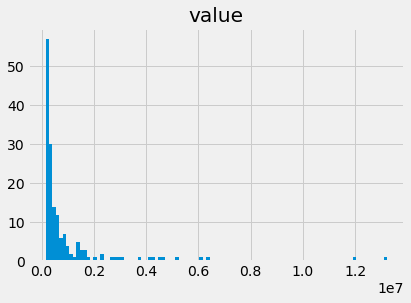

In [645]:
#Tidy up the column names and specific columns to make it easier to conduct analysis.
import matplotlib as plt
dfmetro.columns = dfmetro.columns.str.lower()
dfmetro.columns = dfmetro.columns.str.replace(' ', '_')
dfmetro.variables = dfmetro.variables.str.lower()
dfmetro.variables = dfmetro.variables.str.replace(' ', '_')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('(Greater)','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace(r"\(.*?\)","")
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('-','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace(' ','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.replace('[\([{})\]]','')
dfmetro.metropolitan_areas = dfmetro.metropolitan_areas.str.lower()


#print(dfmetro.variables.unique())
h = dfmetro[(dfmetro['variables'] == 'working_age_population_group_(15-64)') & (dfmetro.year == 2018)]
h.hist(column='value',bins=100) #This shows that population density is not normally distributed with most of the data on the left handside of the distribution.
print(h.value.mean()) #The mean population density is 167.1
print(h.value.median()) #The median population density is 126.5
#WB data for the USA shows that population density (population per km2 of land) in 2020 was 36. Therefore, this dataset of cities is significantly larger than the country as a whole.
dfmetro.columns

<ipython-input-646-08bfae83711e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['diff_avg'] = ((x['value'] - x.value.median())/x.value.median())
<ipython-input-646-08bfae83711e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['diff_avg'] = ((y['value'] - y.value.mean())/y.value.median())


array(['ada', 'alachua', 'albany', 'albuquerque', 'allen', 'atlanta',
       'atlanticcity', 'austin', 'bell', 'benton', 'berks', 'boston',
       'boulder', 'brazos', 'brevard', 'brown', 'butte', 'caddo',
       'cameron', 'charleston', 'charlotte', 'chatham', 'chicago',
       'cincinnati', 'collier', 'columbus', 'cumberland', 'cuyahoga',
       'dallas', 'dane', 'dauphin', 'davidson', 'denver', 'detroit',
       'douglas', 'durham', 'eastbatonrouge', 'elpaso', 'erie',
       'escambia', 'fayette', 'forsyth', 'fresno', 'genesee', 'greene',
       'greenville', 'guilford', 'hamilton', 'hampden', 'hartford',
       'hidalgo', 'houston', 'indianapolis', 'ingham', 'jackson',
       'jacksonville', 'jefferson', 'kalamazoo', 'kent', 'kern', 'knox',
       'lackawanna', 'lafayette', 'lancaster', 'lane', 'larimer',
       'lasvegas', 'lee', 'lehigh', 'losangeles', 'lubbock', 'lucas',
       'luzerne', 'madison', 'mahoning', 'marion', 'mclennan', 'memphis',
       'merced', 'miami', 'milwauke

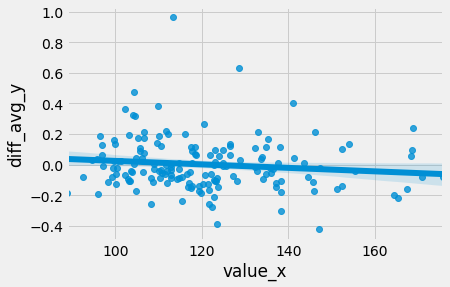

In [646]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = dfmetro[(dfmetro['variables'] == 'growth/shrinking_index_of_the_total_population_(2001=100)') & (dfmetro.year == 2019)]
x['diff_avg'] = ((x['value'] - x.value.median())/x.value.median())
y = dfmetro[(dfmetro['variables'] == 'labour_productivity_(gdp_per_worker_in_usd,_constant_prices,_constant_ppp,_base_year_2015)') & (dfmetro.year == 2019)]
y['diff_avg'] = ((y['value'] - y.value.mean())/y.value.median())
mdf = pd.merge(x,y,left_on='metro_id',right_on='metro_id')
mdf = mdf.sort_values('diff_avg_x',ascending=False)


from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(mdf[['value_x']], mdf[['diff_avg_y']])

#xfit = np.linspace(-1, 7, 162)
#yfit = model.predict(mdf[['value_x']])

#plt.scatter(mdf['value_x'],mdf['diff_avg_y'])
#plt.plot(xfit, yfit,color='red')
sns.regplot(data=mdf,x='value_x',y='diff_avg_y')
mdf.metropolitan_areas_x.sort_values(ascending=True).unique()


In [647]:
dfeduc = pd.read_excel(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\US_educationa_attainment_metro.xlsx')
dfeduc.columns = dfeduc.columns.str.lower()
dfeduc.columns = dfeduc.columns.str.replace(' ','_')
dfeduc[['name','state_abbrv']] = dfeduc['name'].str.split(',',1,expand=True)
dfeduc.name = dfeduc.name.str.replace('-','')
dfeduc.name = dfeduc.name.str.replace(' ','')
dfeduc.name = dfeduc.name.str.lower()
dfeduc.name.sort_values(ascending=True).unique()
dfeduc.columns


Index(['name', 'ba+', 'other',
       'population_age_25+_with_at_least_a_bachelor's_degree_(2017)',
       'share_of_population_age_25+_with_at_least_a_bachelor's_degree',
       'share_(rank_out_of_388)',
       'percentage_point_increase:_share_of_population_age_25+_with_at_least_a_bachelor's_degree_(2007-2017)',
       'change_(rank_out_of_388)', '2007_ba+', '2012_ba+', '2017_ba+',
       'state_abbrv'],
      dtype='object')

In [648]:
mmdf = pd.merge(mdf,dfeduc,left_on='metropolitan_areas_x',right_on='name')
mmdf

,metro_id,metropolitan_areas_x,var_x,variables_x,time_x,year_x,unit_code_x,unit_x,powercode_code_x,powercode_x,reference_period_code_x,reference_period_x,value_x,flag_codes_x,flags_x,diff_avg_x,metropolitan_areas_y,var_y,variables_y,time_y,year_y,unit_code_y,unit_y,powercode_code_y,powercode_y,reference_period_code_y,reference_period_y,value_y,flag_codes_y,flags_y,diff_avg_y,name,ba+,other,population_age_25+_with_at_least_a_bachelor's_degree_(2017),share_of_population_age_25+_with_at_least_a_bachelor's_degree,share_(rank_out_of_388),percentage_point_increase:_share_of_population_age_25+_with_at_least_a_bachelor's_degree_(2007-2017),change_(rank_out_of_388),2007_ba+,2012_ba+,2017_ba+,state_abbrv
0,USA69,charleston,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,144.6,NaN,NaN,0.229592,charleston,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,82582.0,NaN,NaN,-0.080375,charleston,0.228,0.772,35949.216,22.8,267,3.1,210,19.7,21.5,22.8,WV
1,USA98,greenville,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,136.0,NaN,NaN,0.156463,greenville,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,84733.0,NaN,NaN,-0.055738,greenville,0.309,0.691,32609.388,30.9,125,4.6,61,26.3,25.6,30.9,NC
2,USA33,jacksonville,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,134.9,NaN,NaN,0.147109,jacksonville,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,84193.0,NaN,NaN,-0.061923,jacksonville,0.299,0.701,296025.249,29.9,142,4.3,80,25.6,27.0,29.9,FL
3,USA33,jacksonville,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,134.9,NaN,NaN,0.147109,jacksonville,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,84193.0,NaN,NaN,-0.061923,jacksonville,0.202,0.798,20515.322,20.2,319,4.5,70,15.7,18.4,20.2,NC
4,USA71,elpaso,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,134.2,NaN,NaN,0.141156,elpaso,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,81149.0,NaN,NaN,-0.096788,elpaso,0.221,0.779,111837.934,22.1,278,4.1,94,18.0,20.2,22.1,TX
5,USA59,elpaso,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,121.6,NaN,NaN,0.034014,elpaso,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,67245.0,NaN,NaN,-0.256042,elpaso,0.221,0.779,111837.934,22.1,278,4.1,94,18.0,20.2,22.1,TX
6,USA127,madison,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,132.3,NaN,NaN,0.125000,madison,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,88183.0,NaN,NaN,-0.016223,madison,0.448,0.552,189713.216,44.8,17,3.6,157,41.2,42.1,44.8,WI
7,USA154,merced,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,126.6,NaN,NaN,0.076531,merced,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,94875.0,NaN,NaN,0.060426,merced,0.137,0.863,21448.994,13.7,385,1.0,369,12.7,12.5,13.7,CA
8,USA46,richmond,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,124.9,NaN,NaN,0.062075,richmond,GDP_PW_REAL_PPP,"labour_productivity_(gdp_per_worker_in_usd,_co...",2019,2019,USD,US Dollar,0,Units,NaN,NaN,97757.0,NaN,NaN,0.093436,richmond,0.352,0.648,306392.768,35.2,62,5.0,36,30.2,31.7,35.2,VA
9,USA31,columbus,POP_TOT_GI,growth/shrinking_index_of_the_total_population...,2019,2019,NaN,NaN,0,Units,NaN,NaN,124.9,NaN,NaN,0.062075,columbus,GDP_PW_REAL_PPP,"labour_productivity_(gdp_pe

In [683]:
#The best way to work with an api from Bea is to use the xml format over the json format.
#This is because vegalite cannot read large numbers in the json format of the api because there are commas in the numbers.
#Therefore I found it better to read the data in an xml format in Jupyter notebook and then conduct the analysis before taking the data into vegalite.

#https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetParameterValuesFiltered&datasetname=Regional&TargetParameter=LineCode&TableName=CAGDP1&ResultFormat=xml


#CAGDP1-3 GDP in current USD.
df = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAGDP1&LineCode=3&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df
#CAINC30-100 Total population.
df1 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=100&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df1
#CAINC30-190 Wages and Salaries.
df2 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=190&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df2
#CAINC30-300 Average Wages and Salaries.
df3 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=300&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df3
#CAINC30-300 Average Wages and Salaries.
df4 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=300&Year=2018&GeoFips=MIC&ResultFormat=xml',xpath="//Data", encoding='cp1252') #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df4

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAINC30-300,10100,"Aberdeen, SD (Micropolitan Statistical Area)",2018,Dollars,0,"42,252",None
1,CAINC30-300,10140,"Aberdeen, WA (Micropolitan Statistical Area)",2018,Dollars,0,"41,710",None
2,CAINC30-300,10220,"Ada, OK (Micropolitan Statistical Area)",2018,Dollars,0,"44,309",None
3,CAINC30-300,10300,"Adrian, MI (Micropolitan Statistical Area)",2018,Dollars,0,"44,210",None
4,CAINC30-300,10460,"Alamogordo, NM (Micropolitan Statistical Area)",2018,Dollars,0,"43,876",None
...,...,...,...,...,...,...,...,...
538,CAINC30-300,49300,"Wooster, OH (Micropolitan Statistical Area)",2018,Dollars,0,"46,472",None
539,CAINC30-300,49380,"Worthington, MN (Micropolitan Statistical Area)",2018,Dollars,0,"43,381",None
540,CAINC30-300,49460,"Yankton, SD (Micropolitan Statistical Area)",2018,Dollars,0,"43,023",None
541,CAINC30-300,49780,"Zanesville, OH (Micropolitan Statistical Area)",2018,Dollars,0,"41,945",None


In [684]:
#For loop to clean data for all df from Bea API.
for z in [df, df1, df2, df3, df4]:
    i = z
    i.columns = i.columns.str.lower()
    i.columns = i.columns.astype('str').str.replace(' ','_')
    i.datavalue = i.datavalue.astype('str').str.replace(",",'')
    i.datavalue = i.datavalue.astype('float')
    i.geoname = i.geoname.str.replace(' ','')
    i.geoname = i.geoname.str.lower()
    i.geoname = i.geoname.str.replace('-','')
    i[['name','state_abbrv']] = i['geoname'].str.split(',',1,expand=True)
    i['comp_us_%'] = ((i['datavalue'] - i.datavalue[0])/i.datavalue[0])*100
    i['comp_avg_%'] = ((i['datavalue'] - i.datavalue.median())/i.datavalue.median())*100
    i['ln_dv'] = np.log(i.datavalue)

In [687]:
#Join all the df from the API together.
mdf = df.join(df1.set_index('geoname'),on='geoname',lsuffix='_df',rsuffix='_df1')
mdf = mdf.join(df2.set_index('geoname'),on='geoname',rsuffix='_df2')
mdf = mdf.join(df3.set_index('geoname'),on='geoname',rsuffix='_df3')
mdf.columns
mdf['gdp_per_c'] = mdf['datavalue_df'] / mdf['datavalue_df1'] #Now I have gdp per capita for each MSA.
mdf['ln_gdp_per_c'] = np.log(mdf['gdp_per_c'])
mdf['comp_us_%_gdp_per_c'] = ((mdf['gdp_per_c'] - mdf.gdp_per_c[0])/mdf.datavalue[0])*100
mdf['comp_avg_%_gdp_per_c'] = ((mdf['gdp_per_c'] - mdf.gdp_per_c.median())/mdf.datavalue.median())*100
mmdf = mdf.join(dfeduc.set_index('name'),on='name',rsuffix='_educ')
mmdf['ba+_educm100'] = mmdf['ba+']*100
mmdf

,code_df,geofips_df,geoname,timeperiod_df,cl_unit_df,unit_mult_df,datavalue_df,noteref_df,name_df,state_abbrv_df,comp_us_%_df,comp_avg_%_df,ln_dv_df,code_df1,geofips_df1,timeperiod_df1,cl_unit_df1,unit_mult_df1,datavalue_df1,noteref_df1,name_df1,state_abbrv_df1,comp_us_%_df1,comp_avg_%_df1,ln_dv_df1,code,geofips,timeperiod,cl_unit,unit_mult,datavalue,noteref,name,state_abbrv,comp_us_%,comp_avg_%,ln_dv,code_df3,geofips_df3,timeperiod_df3,cl_unit_df3,unit_mult_df3,datavalue_df3,noteref_df3,name_df3,state_abbrv_df3,comp_us_%_df3,comp_avg_%_df3,ln_dv_df3,gdp_per_c,ln_gdp_per_c,comp_us_%_gdp_per_c,comp_avg_%_gdp_per_c,ba+,other,population_age_25+_with_at_least_a_bachelor's_degree_(2017),share_of_population_age_25+_with_at_least_a_bachelor's_degree,share_(rank_out_of_388),percentage_point_increase:_share_of_population_age_25+_with_at_least_a_bachelor's_degree_(2007-2017),change_(rank_out_of_388),2007_ba+,2012_ba+,2017_ba+,state_abbrv_educ,ba+_educm100
0,CAGDP1-3,998,unitedstates(metropolitanportion),2018,Thousands of dollars,3,1.841535e+10,None,unitedstates(metropolitanportion),None,0.000000,146634.564988,23.636451,CAINC30-100,998.0,2018.0,Number of persons,0.0,281421381.0,None,unitedstates(metropolitanportion),None,0.000000,112247.004108,19.455364,CAINC30-190,998.0,2018.0,Thousands of dollars,3.0,8.157592e+09,None,unitedstates(metropolitanportion),None,0.000000,151958.809349,22.822215,CAINC30-300,998.0,2018.0,Dollars,0.0,59609.0,None,unitedstates(metropolitanportion),None,0.000000,26.531522,10.995562,65.436939,4.181087,0.000000e+00,0.000282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAGDP1-3,10180,"abilene,tx(metropolitanstatisticalarea)",2018,Thousands of dollars,3,7.276717e+06,None,abilene,tx(metropolitanstatisticalarea),-99.960486,-42.018713,15.800190,CAINC30-100,10180.0,2018.0,Number of persons,0.0,171138.0,None,abilene,tx(metropolitanstatisticalarea),-99.939188,-31.679528,12.050226,CAINC30-190,10180.0,2018.0,Thousands of dollars,3.0,3.399340e+06,None,abilene,tx(metropolitanstatisticalarea),-99.958329,-36.635761,15.039092,CAINC30-300,10180.0,2018.0,Dollars,0.0,44010.0,None,abilene,tx(metropolitanstatisticalarea),-26.168867,-6.580344,10.692172,42.519587,3.749965,-2.809328e-07,-0.000145,0.215,0.785,22874.495,21.5,290.0,1.4,345.0,20.1,21.6,21.5,TX,21.5
2,CAGDP1-3,10420,"akron,oh(metropolitanstatisticalarea)",2018,Thousands of dollars,3,3.707062e+07,None,akron,oh(metropolitanstatisticalarea),-99.798697,195.380767,17.428335,CAINC30-100,10420.0,2018.0,Number of persons,0.0,703818.0,None,akron,oh(metropolitanstatisticalarea),-99.749906,180.973121,13.464275,CAINC30-190,10420.0,2018.0,Thousands of dollars,3.0,1.734578e+07,None,akron,oh(metropolitanstatisticalarea),-99.787366,223.328085,16.668860,CAINC30-300,10420.0,2018.0,Dollars,0.0,50009.0,None,akron,oh(metropolitanstatisticalarea),-16.104951,6.153683,10.819958,52.670747,3.964060,-1.564946e-07,0.000044,0.308,0.692,148040.200,30.8,126.0,3.0,221.0,27.8,28.3,30.8,OH,30.8
3,CAGDP1-3,10500,"albany,ga(metropolitanstatisticalarea)",2018,Thousands of dollars,3,5.738808e+06,None,albany,ga(metropolitanstatisticalarea),-99.968837,-54.272858,15.562762,CAINC30-100,10500.0,2018.0,Number of persons,0.0,147919.0,None,albany,ga(metropolitanstatisticalarea),-99.947439,-40.948849,11.904420,CAINC30-190,10500.0,2018.0,Thousands of dollars,3.0,2.727856e+06,None,albany,ga(metropolitanstatisticalarea),-99.966561,-49.152329,14.819027,CAINC30-300,10500.0,2018.0,Dollars,0.0,42194.0,None,albany,ga(metropolitanstatisticalarea),-29.215387,-10.435152,10.650033,38.796963,3.658342,-3.265667e-07,-0.000214,0.195,0.805,19459.830,19.5,331.0,1.6,330.0,17.9,16.1,19.5,GA,19.5
3,CAGDP1-3,10500,"albany,ga(metropolitanstatisticalarea)",2018,Thousands of dollars,3,5.738808e+06,None,albany,ga(metropolitanstatisticalarea),-99.968837,-54.272858,15.562762,CAINC30-100,10500.0,2018.0,Number of persons,0.0,147919.0,None,albany,ga(metropolitanstatisticalarea),-99.947439,-40.948849,11.904420,CAINC30-190,10500.0,2018.0,Thousands o

In [688]:
mmdf.columns

Index(['code_df', 'geofips_df', 'geoname', 'timeperiod_df', 'cl_unit_df',
       'unit_mult_df', 'datavalue_df', 'noteref_df', 'name_df',
       'state_abbrv_df', 'comp_us_%_df', 'comp_avg_%_df', 'ln_dv_df',
       'code_df1', 'geofips_df1', 'timeperiod_df1', 'cl_unit_df1',
       'unit_mult_df1', 'datavalue_df1', 'noteref_df1', 'name_df1',
       'state_abbrv_df1', 'comp_us_%_df1', 'comp_avg_%_df1', 'ln_dv_df1',
       'code', 'geofips', 'timeperiod', 'cl_unit', 'unit_mult', 'datavalue',
       'noteref', 'name', 'state_abbrv', 'comp_us_%', 'comp_avg_%', 'ln_dv',
       'code_df3', 'geofips_df3', 'timeperiod_df3', 'cl_unit_df3',
       'unit_mult_df3', 'datavalue_df3', 'noteref_df3', 'name_df3',
       'state_abbrv_df3', 'comp_us_%_df3', 'comp_avg_%_df3', 'ln_dv_df3',
       'gdp_per_c', 'ln_gdp_per_c', 'comp_us_%_gdp_per_c',
       'comp_avg_%_gdp_per_c', 'ba+', 'other',
       'population_age_25+_with_at_least_a_bachelor's_degree_(2017)',
       'share_of_population_age_25+_with_at_

(428, 65)
The Mean Squared Error is- 15759209.054370446
0.7224495655154837
Coefficients: 
 [[23213.47438533   158.02976274  2096.53809736]]
Variance score: 0.7224495655154837
Ttest_1sampResult(statistic=array([167.16042473,  20.91821139, 126.64752893]), pvalue=array([3.96951825e-139, 5.28605399e-041, 2.42812390e-125]))


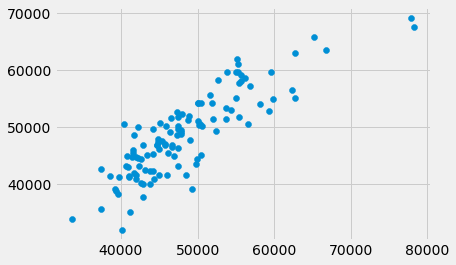

In [723]:
#Multiple linear regression
mmdf.columns
print(mmdf.shape)
mmdf = mmdf.sort_values(by='datavalue_df',ascending=False)
data = mmdf[1:]
yvar = 'datavalue_df3'
x1var = 'ln_gdp_per_c'
x2var = "percentage_point_increase:_share_of_population_age_25+_with_at_least_a_bachelor's_degree_(2007-2017)"
x3var = 'ln_dv_df1'
data1 = data[data[x1var].notnull() & data[x2var].notnull() & data[x3var].notnull() & data[yvar].notnull()]
x = data1[[x1var,x2var,x3var]]
y = data1[[yvar]]

from sklearn.model_selection import train_test_split
trains = 0.70
tests = 1 - trains
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = trains, test_size = tests, random_state = 100)



from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

#Predicting the Test set result 
y_pred = regressor.predict(X_test)


from sklearn.metrics import mean_squared_error 
print("The Mean Squared Error is- {}".format(mean_squared_error(y_test, y_pred))) 

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

plt.scatter(y_test,y_pred)
print('Coefficients: \n', regressor.coef_) #Shows the coefficients of the 3 regressors used in the model.
print('Variance score: {}'.format(regressor.score(X_test, y_test)))
import scipy
from scipy import stats
print(scipy.stats.ttest_1samp(X_test,popmean=0))
yt = pd.DataFrame(y_test)
yp = pd.DataFrame(y_pred)

fdf1 = pd.DataFrame(data = X_test)

fdf1.columns = ['x1var','x2var','x3var']
fdf1['y_test'] = yt
yp.columns = ['y_pred']
fdf1['y_pred'] = regressor.predict(fdf1[['x1var','x2var','x3var']])
fdf1.head(2)
X_test = X_test[['x1var','x2var','x3var']]
fdf1.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\ml_bea_data.csv')
#https://raw.githubusercontent.com/107SBakst/107SBakst.github.io/main/data/ml_bea_data.csv

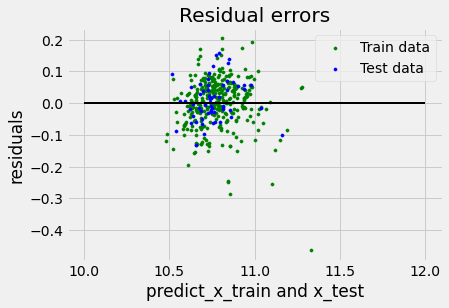

In [719]:
plt.style.use('fivethirtyeight')
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 10, xmax = 12, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel('predict_x_train and x_test')
plt.ylabel('residuals')
plt.show()

In [675]:
#Are average wages in MSA statistically different from average wages in Micropolation areas.
df3 = df3[1:] #Removes USA total from df
df4 = df4[1:] #Removes USA total from df
print(df3.datavalue.mean()) # Mean average salary in MSA.
print(df3.datavalue.median()) # Median average salary in MSA.
print(df3.datavalue.std()) # Standard deviation of average salary in MSA.

print(df4.datavalue.mean()) # Mean average salary in MIC.
print(df4.datavalue.median()) # Median average salary in MIC.
print(df4.datavalue.std()) # Standard deviation of average salary in MIC.

t = ((df3.datavalue.mean() - df4.datavalue.mean())/ (((df3.datavalue.std())**2/len(df3.datavalue)) + (((df4.datavalue.std())**2)/len(df4.datavalue)))**0.5)
print(t) # Therefore we reject the null hypothesis that the average sallary in MSA areas is not different from the average sallary in MIC areas.


48712.55352480418
47110.0
8966.18236898849
41872.46025878004
40998.0
5771.67119074414
13.127904785739537


In [678]:
fdf

,x1var,x2var,x3var,y_test,y_pred
213,-0.000104,1.2,27.617538,-6.187646,-5.026915
130,-0.000074,2.6,31.058353,0.783273,-3.266464
106,-0.000091,3.9,-27.717741,-13.445128,-3.992929
51,-0.000239,3.1,-33.524689,-9.482063,-10.533691
40,-0.000090,2.7,-32.816486,-10.418170,-4.370770
370,-0.000072,2.8,-53.246198,-9.452346,-3.751125
123,-0.000264,3.1,-41.035079,-16.618552,-11.654902
143,0.000082,3.6,206.236102,1.940140,5.074658
216,-0.000205,2.0,-37.573904,-5.881978,-9.531915
86,-0.000207,2.3,-60.894716,-8.883464,-9.678164
